In [28]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import zscore
from ydata_profiling import ProfileReport
from ipyvizzu import Chart, Data, Config, Style
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [29]:
#Read the data from CSV files
df = pd.read_csv('data_saudi_used_cars.csv')

In [21]:
df['Make'].value_counts()

Make
Toyota          1431
Hyundai          670
Ford             530
Chevrolet        458
Nissan           387
GMC              282
Kia              251
Mercedes         226
Lexus            222
Mazda            129
Honda            115
BMW               97
Dodge             95
Mitsubishi        94
Land Rover        79
Jeep              56
Chrysler          50
Audi              38
Changan           36
Renault           35
Cadillac          31
Genesis           31
Isuzu             25
Geely             24
Volkswagen        23
Porsche           22
MG                21
Suzuki            16
Lincoln           16
INFINITI          15
HAVAL             14
MINI              11
Other             10
Daihatsu           9
Jaguar             9
Mercury            9
Peugeot            8
Fiat               7
Hummer             5
Bentley            4
Great Wall         4
FAW                4
Rolls-Royce        3
Maserati           3
GAC                3
Foton              2
Zhengzhou          2
Aston Ma

In [30]:
# Get the value counts of 'Make'
make_counts = df['Make'].value_counts()

In [33]:
# Filter the DataFrame to include only 'Make' values with counts >= 50 and Negotiable = False
df_non_negotiable = df[(df['Make'].isin(make_counts[make_counts >= 79].index)) & (df['Negotiable'] == False)]

# df_filtered['Make'].value_counts()

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [181]:
# print the first 5 rows
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [182]:
#print the count of the rows and columns 
df.shape

(5624, 11)

In [183]:
#print same informtions about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [184]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [185]:
#The dataset is secured due to the registration of the site - Sayyarh - on the Maroof platform

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [186]:
#We have used data that was available from the stakeholders

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [187]:
#Consistency is not required because there is only one dataset

#### 4. Relevance: 


In [188]:
#We only have one dataset and it is consistent with each other and the columns are consistent with the dataset that follows it

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [189]:
# NOTE : DATA IS NOT CLEANED YET

# Generate a profile report using ydata_profiling
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Display the report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
# Drop duplicate rows from the dataframe
df.drop_duplicates(inplace=True)

# Print the number of duplicated rows again to confirm they have been removed
print(df.duplicated().sum())

0


#### 6. Completeness: 

In [191]:
#Display number missing values per column
print(df.isnull().sum())

df.info()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 5620 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5620 non-null   object 
 1   Region       5620 non-null   object 
 2   Make         5620 non-null   object 
 3   Gear_Type    5620 non-null   object 
 4   Origin       5620 non-null   object 
 5   Options      5620 non-null   object 
 6   Year         5620 non-null   int64  
 7   Engine_Size  5620 non-null   float64
 8   Mileage      5620 non-null   int64  
 9   Negotiable   5620 non-null   bool   
 10  Price        5620 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 488.5+ KB


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [192]:
# check columns types 
df.dtypes

Type            object
Region          object
Make            object
Gear_Type       object
Origin          object
Options         object
Year             int64
Engine_Size    float64
Mileage          int64
Negotiable        bool
Price            int64
dtype: object

In [193]:
# go to clean them 

In [194]:
# exclude year column using filter 
df[['Price','Mileage','Engine_Size']].describe()
# 

,Price,Mileage,Engine_Size
count,5620.000000,5.620000e+03,5620.000000
mean,53086.404448,1.509222e+05,3.296299
std,70175.153207,3.829633e+05,1.515253
min,0.000000,1.000000e+02,1.000000
25%,0.000000,3.800000e+04,2.000000
50%,36500.000000,1.030000e+05,3.000000
75%,73000.000000,1.960000e+05,4.500000
max,850000.000000,2.000000e+07,9.000000


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

In [195]:
# no missing values

In [196]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [197]:
# we will create two dataframes, one for the non-negotiable cars and one for the negotiable cars that priced as 0
df_non_negotiable = df[df['Negotiable']==False]
df_negotiable = df[df['Negotiable']==True]

In [198]:
# go back to 7th dimension Accuracy 

## 3. Univariate Analysis: 

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

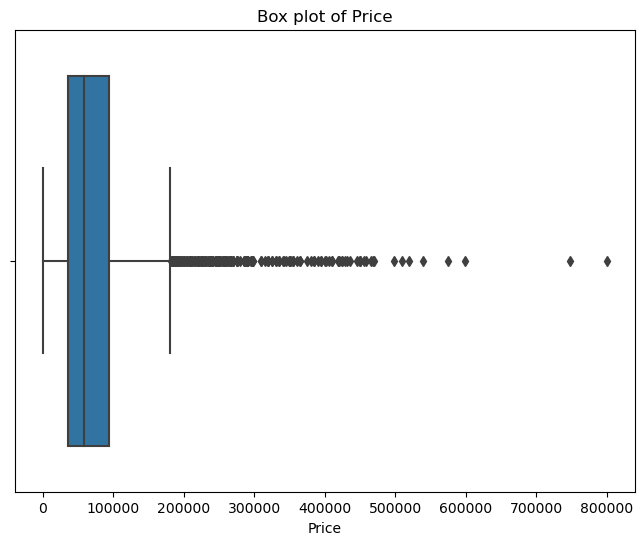

In [34]:
# Detect outliers
#  univariate graphical analysis

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_non_negotiable['Price'])
plt.title('Box plot of Price')
plt.show()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd

AttributeError: Rectangle.set() got an unexpected keyword argument 'gap'

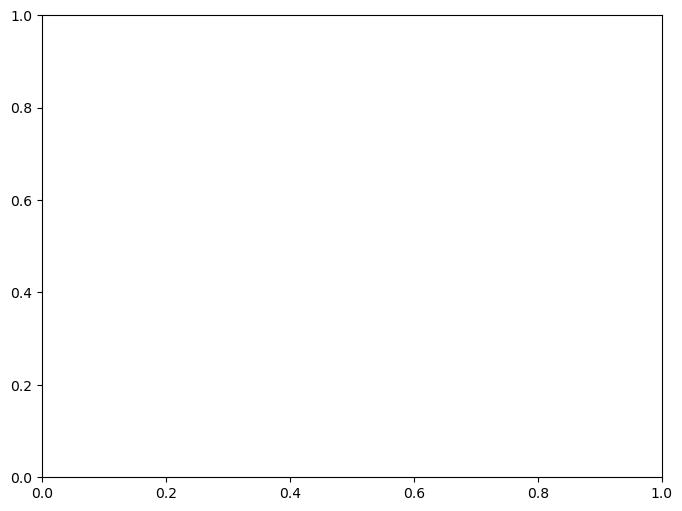

In [35]:
#horizantal bar chart to show price with 9 regions

plt.figure(figsize=(8, 6))
# distance between each bar
sns.barplot(x=df_non_negotiable['Price'].head(20), y=df_non_negotiable['Region'].head(20), orient='h',gap=0.2)
plt.title('Price by Region')
plt.show()

In [36]:
# Prepare the data for the chart
region_price_df = df_non_negotiable[['Price', 'Region']].head(20)

# Create a Data object and add the DataFrame
data = Data()
data.add_df(region_price_df)

# Create a Chart object
chart = Chart()

# Configure the chart to be a horizontal bar chart
chart.animate(data)
chart.animate(
    Config(
        {
            "x": "Region",
            "y": "Price",
            "geometry": "rectangle",
            "title": "Price by Region"
        }
    )
)

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [201]:
df_non_negotiable

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


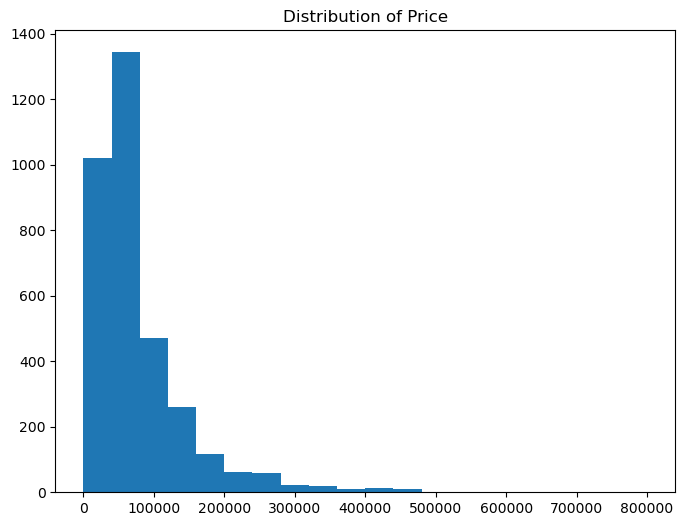

In [37]:
# we need to understand the central tendency and spread of the variable pf mileage using histogram
plt.figure(figsize=(8, 6))
plt.hist(x=df_non_negotiable['Price'], bins=20)
plt.title('Distribution of Price')
plt.show()

In [203]:
# No pattern outlier nor human outlier in price

### 2. Univariate Non-Graphical analysis: 

In [38]:
# detect mileage outliers using non-graphical statistical analysis
print("minimum value: ", round(df_non_negotiable['Mileage'].min()))
print("maximum value: ", round(df_non_negotiable['Mileage'].max()))
print("median value: ", round(df_non_negotiable['Mileage'].median()))
print("mean value: ", round(df_non_negotiable['Mileage'].mean()))
print("standard deviation: ", round(df_non_negotiable['Mileage'].std()))


minimum value:  100
maximum value:  20000000
median value:  106000
mean value:  147835
standard deviation:  398328


In [205]:
# filter miximum value of mileage
len(df_non_negotiable[df_non_negotiable['Mileage'] >= 8000000])

1

In [39]:
# that is clearly an outlier, we need to deal with it
df_non_negotiable = df_non_negotiable[df_non_negotiable['Mileage'] < 8000000]

## 4. Bivariate/Multivariate Analysis:

**Categorical & numerical --> (scatter plot)**

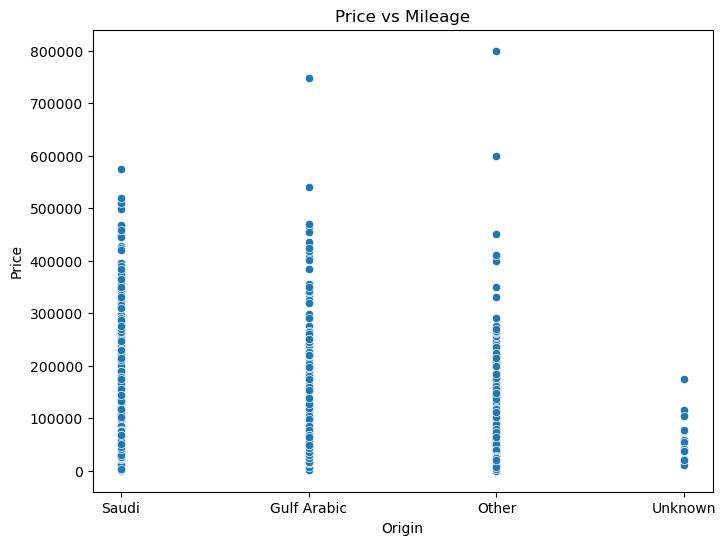

In [40]:
# **Categorical & numerical --> (scatter plot) analysis**
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_non_negotiable['Origin'], y=df_non_negotiable['Price'])
plt.title('Price vs Mileage')
plt.show()

In [41]:
# there is clearly pattern outliers in price, we need to deal with it
df_non_negotiable = df_non_negotiable[df_non_negotiable['Price'] < 550000]

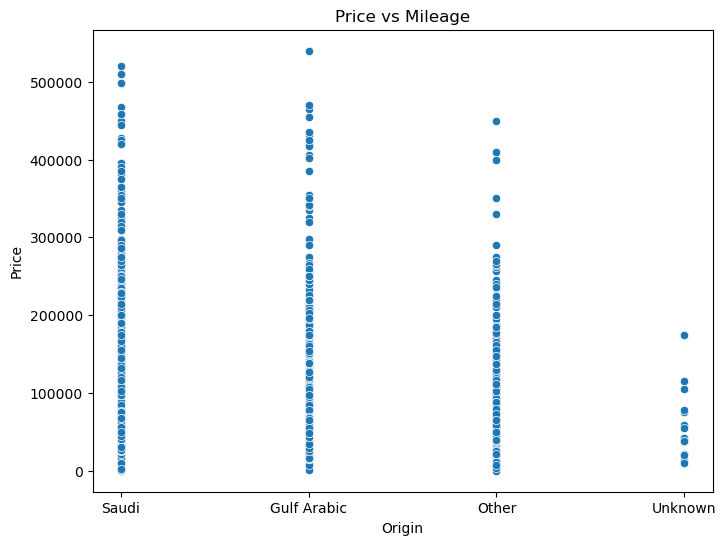

In [42]:
# data without outliers

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_non_negotiable['Origin'], y=df_non_negotiable['Price'])
plt.title('Price vs Mileage')
plt.show()

**numerical & numerical --> (line chart)**

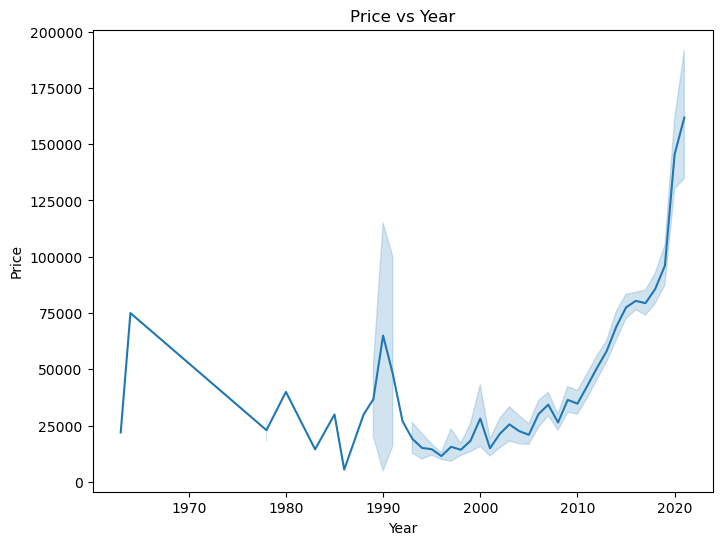

In [43]:
# **numrical & numerical --> (line plot) analysis**
plt.figure(figsize=(8, 6))
sns.lineplot(x=df_non_negotiable['Year'], y=df_non_negotiable['Price'])
plt.title('Price vs Year')
plt.show()

# Which region in Saudi Arabia has the largest market for used cars?

In [211]:
#get region frequency
region_count = df_non_negotiable['Region'].value_counts()


region_df = pd.DataFrame({
    'Region' : region_count.index,
    'Market Size' : region_count.values
})

data = Data()
data.add_df(region_df.head(10)) 
chart = Chart()
chart.animate(data)
chart.animate(
    Config.column(
        {
            "x": "Region",
            "y": "Market Size",
            "title": "Saudi Market Size",
        }
    )
)

# During the specified period, which car brand was the most listed for sale?

In [212]:
# extract period from 2010 to 2021

df_priod = df_non_negotiable[(df_non_negotiable["Year"]<= 2021) & (df_non_negotiable["Year"] == 2010)]
df_priod = df_priod['Type'].value_counts() #get brands type frequency

type_df = pd.DataFrame({
    'Type' : df_priod.index,
    'freqency' : df_priod.values
})

data2 = Data()
data2.add_df(type_df.head(10))
 
chart = Chart()
chart.animate(data2)

chart.animate(
    Config.column(
        {
            "x": "Type",
            "y": "freqency",
            "title": "Most selling cars between 2010 and 2021",
        }
    )
)

# Which features most significantly influence the price of a used car?

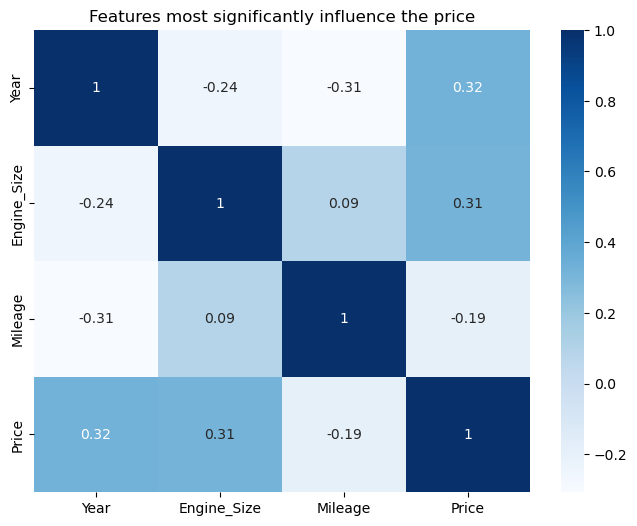

In [213]:
# filter numerical features

df_non_negotiable = df_non_negotiable.select_dtypes(include='number')
plt.figure(figsize=(8, 6))
sns.heatmap(df_non_negotiable.corr(), annot=True, cmap='Blues')
plt.title('Features most significantly influence the price')
plt.show()

In [214]:
# Engine size and Year are the most significant features

# What is the price range for used cars that are approximately four years old?

In [215]:
# What is the price range for used cars that are approximately four years old?
# the 4 years old cars approximatly has 17000 mileage
df_4years_car = df_non_negotiable[df_non_negotiable['Mileage'] < 17000]
data3 = Data()

type_df2 = pd.DataFrame({
    'Year' : df_4years_car['Year'].astype(str),
    'Price': df_4years_car['Price']
})

data3.add_df(type_df2.head(10))
 
chart = Chart()
chart.animate(data3)

chart.animate(
    Config.line(
        {
            "x": "Year",
            "y": "Price",
            "title": "Price range for used cars that are approximately four years old",
        }
    )
)

In [44]:
df_non_negotiable

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [ ]:
# save the df_non_negotiable
df_non_negotiable.to_excel('df_non_negotiable.xlsx', index=False)